In [1]:
import pandas as pd
import numpy as np


In [2]:
raw_df = pd.read_csv("loan_data.csv")
raw_df.shape

(9578, 14)

In [3]:
#Getting a Statstical summary of data
raw_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
# Getting the datatype and checking for null values if any
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
raw_df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [6]:
# Encoding the categorical values to numerical
purpose_encoded = pd.get_dummies(raw_df['purpose'])
purpose_encoded.columns = ['purpose_all_other','purpose_credit_card','purpose_debt_consolidation',
                           'purpose_educational','purpose_home_improvement','purpose_major_purchase',
                          'purpose_small_business']
purpose_encoded.head()

,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [7]:
# adding the encoded columns to the df and droping the purpose column
raw_df = raw_df.join(purpose_encoded)
raw_df.drop(['purpose'],axis=1,inplace=True)
raw_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [8]:
raw_df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [9]:
c = ['credit.policy','int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid']
temp_df = raw_df.loc[:,c]
corr = temp_df.corr()

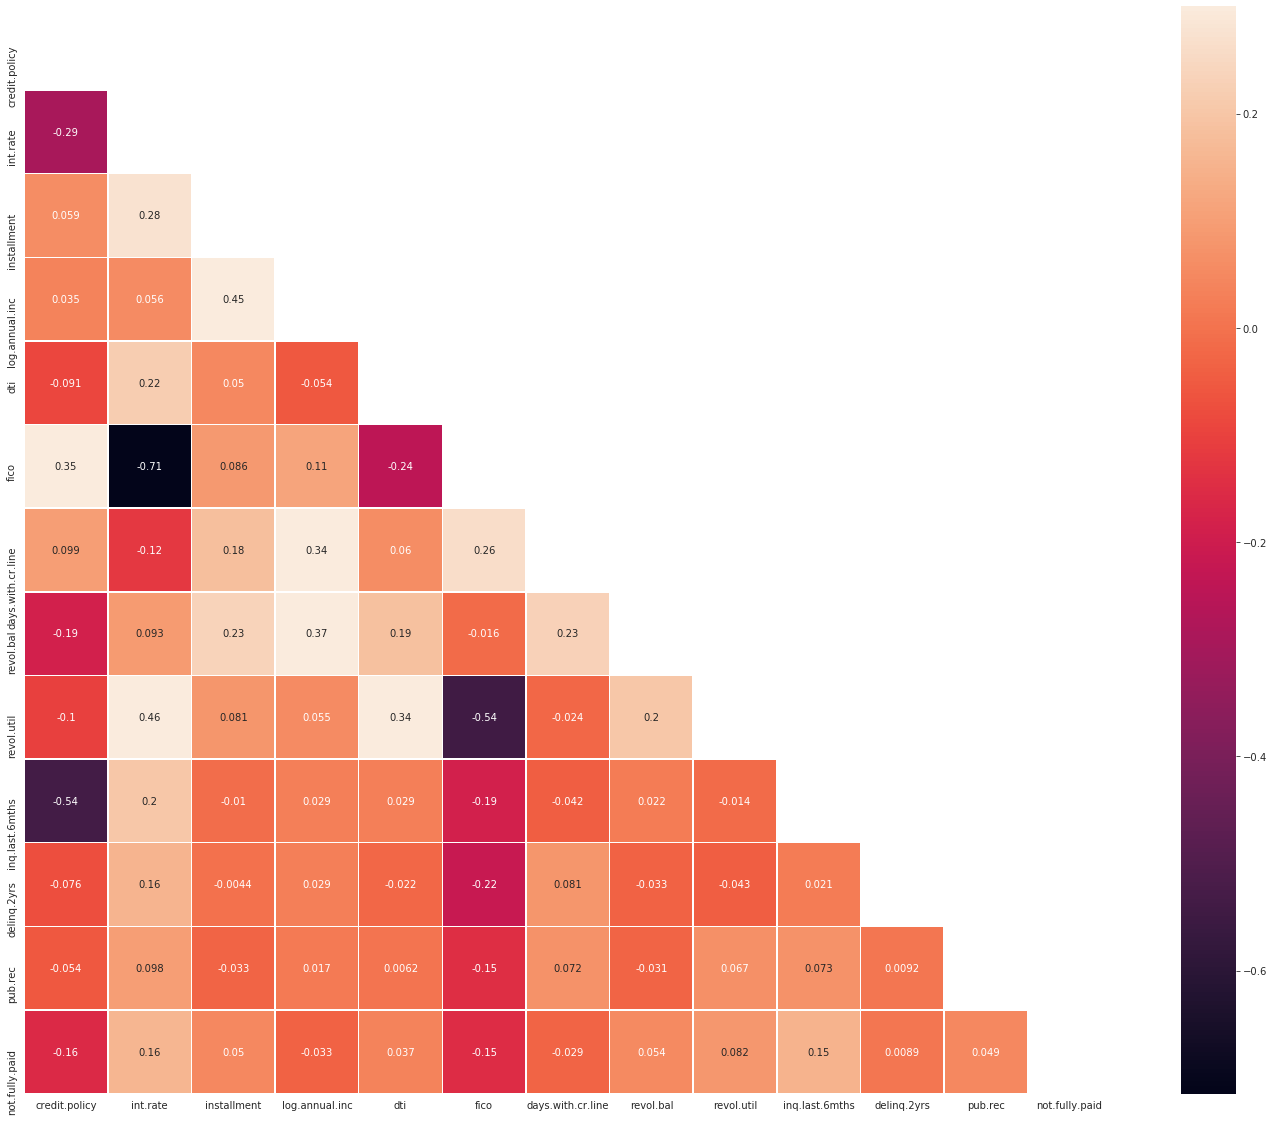

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25,20))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True,linewidth=.5)

In [11]:
# removing features with (+-)0.7 correlation -> fico and int.rate are highly correlated so removing fico
raw_df = raw_df.drop(['fico'],axis=1)
raw_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [12]:
cols = raw_df.shape[1]-1
x = raw_df.drop(['credit.policy'],axis=1).values
y = raw_df['credit.policy'].values
x.shape,y.shape,raw_df.shape,cols

((9578, 18), (9578,), (9578, 19), 18)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_t = sc.fit_transform(x)
x_t

array([[-0.13931753,  2.46309947,  0.68038804, ..., -0.2651173 ,
        -0.21864717, -0.26285458],
       [-0.57886837, -0.43885443,  0.2440308 , ..., -0.2651173 ,
        -0.21864717, -0.26285458],
       [ 0.48648368,  0.23070836, -0.90865897, ..., -0.2651173 ,
        -0.21864717, -0.26285458],
       ...,
       [-0.57886837, -1.06867038, -0.54569448, ..., -0.2651173 ,
        -0.21864717, -0.26285458],
       [ 1.39166043,  0.1569135 , -0.18272998, ...,  3.77191529,
        -0.21864717, -0.26285458],
       [ 0.61685894,  2.58060136,  0.54059439, ..., -0.2651173 ,
        -0.21864717, -0.26285458]])

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.optimizers import SGD, Adam
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
model = Sequential()
model.add(Dense(20, input_dim=cols, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(30,kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(20,kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
epoch=50
lr = 0.001
decay_rate = lr / epoch
momentum = 0.9
sgd = SGD(lr=lr, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_t, y, test_size=0.30, random_state=1)
x_train.shape, x_test.shape

((6704, 18), (2874, 18))

In [18]:
batch = int(x_train.shape[0]/50)
nn_model = model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=epoch,batch_size = batch)

Train on 6704 samples, validate on 2874 samples
Epoch 1/50
6704/6704 [==============================] - 0s 57us/step - loss: 0.7355 - accuracy: 0.5837 - val_loss: 0.5659 - val_accuracy: 0.7683
Epoch 2/50
6704/6704 [==============================] - 0s 16us/step - loss: 0.5299 - accuracy: 0.7874 - val_loss: 0.4982 - val_accuracy: 0.8072
Epoch 3/50
6704/6704 [==============================] - 0s 16us/step - loss: 0.4807 - accuracy: 0.8112 - val_loss: 0.4592 - val_accuracy: 0.8267
Epoch 4/50
6704/6704 [==============================] - 0s 16us/step - loss: 0.4492 - accuracy: 0.8234 - val_loss: 0.4309 - val_accuracy: 0.8340
Epoch 5/50
6704/6704 [==============================] - 0s 18us/step - loss: 0.4265 - accuracy: 0.8374 - val_loss: 0.4087 - val_accuracy: 0.8473
Epoch 6/50
6704/6704 [==============================] - 0s 19us/step - loss: 0.4069 - accuracy: 0.8408 - val_loss: 0.3908 - val_accuracy: 0.8546
Epoch 7/50
6704/6704 [==============================] - 0s 18us/step - loss: 0.393

In [19]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.898, Test: 0.899


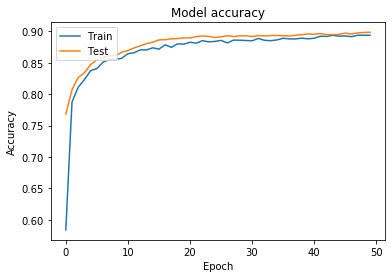

In [20]:
import matplotlib.pyplot as plt
plt.plot(nn_model.history['accuracy'])
plt.plot(nn_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

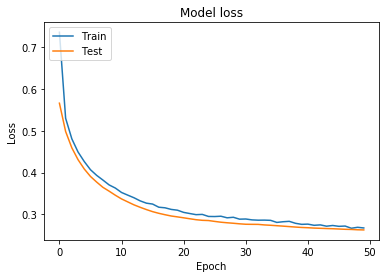

In [21]:
plt.plot(nn_model.history['loss']) 
plt.plot(nn_model.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Hyper parameter tunning

In [23]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
s = x_train.shape[0]
init_mode = ['glorot_normal', 'glorot_uniform', 'he_uniform']
batch_size = [ int(s/20), int(s/50)]
epochs = [75,100]
optimizer = ['SGD', 'RMSprop', 'Adam']
learn_rate = [0.001, 0.01]
momentum = [0.0, 0.5, 0.9] 
activation = ['softplus', 'softmax', 'relu']
dropout_rate = [0.2, 0.4, 0.6, 0.8, 0.9]
from keras.constraints import maxnorm
def create_model(init_mode='glorot_normal',activation='relu',dropout_rate=0.0, learn_rate=0.001,
                neuron=15,optimizer='Adam'):
    model = Sequential()
    model.add(Dense(neuron, input_dim=cols, activation=activation, kernel_initializer=init_mode))
    model.add(BatchNormalization())
    model.add(Dense(neuron, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model_CV = KerasClassifier(build_fn=create_model, verbose=0,epochs=75, batch_size=134)
param_grid = dict(init_mode=init_mode,batch_size=batch_size,epochs=epochs,activation=activation)
grid_search = GridSearchCV(estimator=model_CV, param_grid=param_grid,cv=3,
                           scoring='accuracy', verbose=10, n_jobs=2)
result = grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   15.6s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   20.8s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   36.7s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   51.5s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  2.8min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  3.2min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:  4.1min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:  5.2min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:  6.1min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:  6.9min
[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed:  8.3min finished


In [25]:
print(f'Best Accuracy for {result.best_score_} using {result.best_params_}\n')
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')


Best Accuracy for 0.9197500896256553 using {'activation': 'softmax', 'batch_size': 134, 'epochs': 75, 'init_mode': 'glorot_uniform'}

 mean=0.9056, std=0.003544 using {'activation': 'softplus', 'batch_size': 335, 'epochs': 75, 'init_mode': 'glorot_normal'}
 mean=0.9007, std=0.0003837 using {'activation': 'softplus', 'batch_size': 335, 'epochs': 75, 'init_mode': 'glorot_uniform'}
 mean=0.9021, std=0.0005623 using {'activation': 'softplus', 'batch_size': 335, 'epochs': 75, 'init_mode': 'he_uniform'}
 mean=0.9017, std=0.002442 using {'activation': 'softplus', 'batch_size': 335, 'epochs': 100, 'init_mode': 'glorot_normal'}
 mean=0.9021, std=0.0009007 using {'activation': 'softplus', 'batch_size': 335, 'epochs': 100, 'init_mode': 'glorot_uniform'}
 mean=0.9023, std=0.003717 using {'activation': 'softplus', 'batch_size': 335, 'epochs': 100, 'init_mode': 'he_uniform'}
 mean=0.9083, std=0.00417 using {'activation': 'softplus', 'batch_size': 134, 'epochs': 75, 'init_mode': 'glorot_normal'}
 mea

In [28]:
optimizer = ['SGD', 'RMSprop', 'Adam']
learn_rate = [0.001, 0.01]
momentum = [0.0, 0.5, 0.9] 
dropout_rate = [0.2, 0.4, 0.6, 0.8, 0.9]
# neurons = [10,15,20,25,30]
from keras.constraints import maxnorm
def create_model(init_mode='he_uniform',activation='relu',dropout_rate=0.0,
                neuron=15,optimizer='Adam'):
    model = Sequential()
    model.add(Dense(neuron, input_dim=cols, activation=activation, kernel_initializer=init_mode))
    model.add(BatchNormalization())
    model.add(Dense(neuron, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    #optimizer = Adam(learning_rate=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


model_CV = KerasClassifier(build_fn=create_model, verbose=0,epochs=100, batch_size=30)
param_grid = dict(optimizer=optimizer,dropout_rate=dropout_rate)
grid_search = GridSearchCV(estimator=model_CV, param_grid=param_grid,cv=3,
                           scoring='accuracy', verbose=10,n_jobs=2)
result = grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   53.6s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  4.5min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  6.8min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  8.7min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 11.5min
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed: 13.8min finished


In [29]:
print(f'Best Accuracy for {result.best_score_} using {result.best_params_}\n')
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')


Best Accuracy for 0.909756078021386 using {'dropout_rate': 0.2, 'optimizer': 'Adam'}

 mean=0.8999, std=0.003507 using {'dropout_rate': 0.2, 'optimizer': 'SGD'}
 mean=0.9078, std=0.002881 using {'dropout_rate': 0.2, 'optimizer': 'RMSprop'}
 mean=0.9098, std=0.005236 using {'dropout_rate': 0.2, 'optimizer': 'Adam'}
 mean=0.8987, std=0.003492 using {'dropout_rate': 0.4, 'optimizer': 'SGD'}
 mean=0.9056, std=0.004212 using {'dropout_rate': 0.4, 'optimizer': 'RMSprop'}
 mean=0.905, std=0.004727 using {'dropout_rate': 0.4, 'optimizer': 'Adam'}
 mean=0.8743, std=0.01885 using {'dropout_rate': 0.6, 'optimizer': 'SGD'}
 mean=0.8993, std=0.01252 using {'dropout_rate': 0.6, 'optimizer': 'RMSprop'}
 mean=0.8966, std=0.001888 using {'dropout_rate': 0.6, 'optimizer': 'Adam'}
 mean=0.8477, std=0.02888 using {'dropout_rate': 0.8, 'optimizer': 'SGD'}
 mean=0.8799, std=0.01789 using {'dropout_rate': 0.8, 'optimizer': 'RMSprop'}
 mean=0.8599, std=0.007645 using {'dropout_rate': 0.8, 'optimizer': 'Adam'}

Final Model Neural Network

Train on 6704 samples, validate on 2874 samples
Epoch 1/20
6704/6704 [==============================] - 1s 189us/step - loss: 0.5216 - accuracy: 0.7955 - val_loss: 0.4343 - val_accuracy: 0.8142
Epoch 2/20
6704/6704 [==============================] - 1s 102us/step - loss: 0.4390 - accuracy: 0.8031 - val_loss: 0.3590 - val_accuracy: 0.8264
Epoch 3/20
6704/6704 [==============================] - 1s 96us/step - loss: 0.3802 - accuracy: 0.8364 - val_loss: 0.3021 - val_accuracy: 0.8820
Epoch 4/20
6704/6704 [==============================] - 1s 88us/step - loss: 0.3403 - accuracy: 0.8628 - val_loss: 0.2817 - val_accuracy: 0.8894
Epoch 5/20
6704/6704 [==============================] - 1s 99us/step - loss: 0.3130 - accuracy: 0.8747 - val_loss: 0.2649 - val_accuracy: 0.8970
Epoch 6/20
6704/6704 [==============================] - 1s 96us/step - loss: 0.3036 - accuracy: 0.8793 - val_loss: 0.2654 - val_accuracy: 0.9033
Epoch 7/20
6704/6704 [==============================] - 1s 96us/step - loss: 0.2

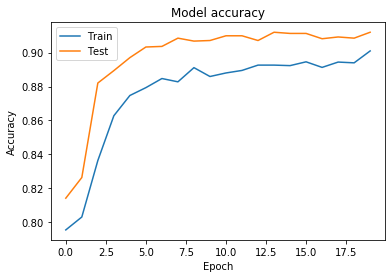

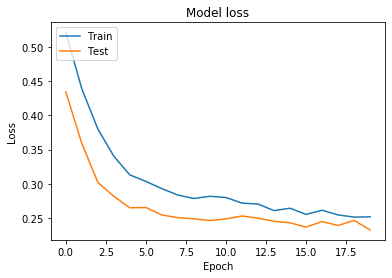

In [30]:
dr = 0.2
model = Sequential()
model.add(Dense(20, input_dim=cols, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(30,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(dr))
model.add(Dense(20,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(dr))
model.add(Dense(20,kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(dr))
model.add(Dense(20,kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))
epoch=20
lr = 0.001
decay_rate = lr / epoch
momentum = 0.9
optimizer = Adam(learning_rate=lr)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
batch = 30 #int(x_train.shape[0]/50)
nn_model = model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=epoch,batch_size = batch)
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plt.plot(nn_model.history['accuracy'])
plt.plot(nn_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(nn_model.history['loss']) 
plt.plot(nn_model.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Accuracy : Train: 0.918, Test: 0.912